### Clustering - Purchase Behavior


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


We are going to cluster every group and then make a segmentation by latent dimensions

In [4]:
df_purchase_behavior = pd.read_csv('../data/processed/purchase_behavior.csv', sep=',')
df_purchase_behavior.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spending
0,58,635,88,546,172,88,88,1617
1,38,11,1,6,2,1,6,27
2,26,426,49,127,111,21,42,776
3,26,11,4,20,10,3,5,53
4,94,173,43,118,46,27,15,422


Now we are going to cluster this data set to know which is the behavior of the client.
We are going to execute Elbow Method and Silhouette Score to every group to know which K is better every time

In [12]:
X = df_purchase_behavior
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

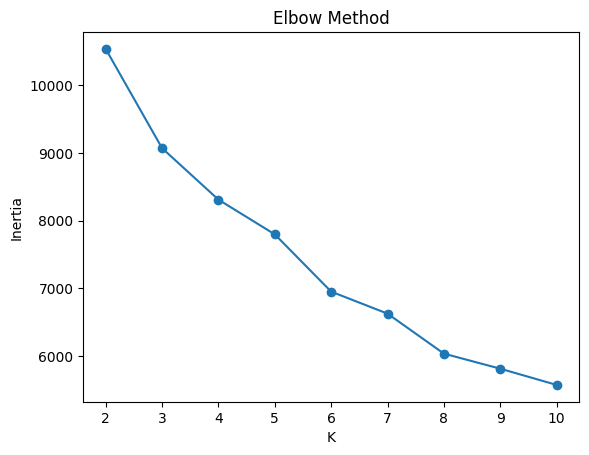

In [14]:
inertia = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [15]:
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k} → Silhouette={score:.3f}")

K=2 → Silhouette=0.445
K=3 → Silhouette=0.353
K=4 → Silhouette=0.325
K=5 → Silhouette=0.296
K=6 → Silhouette=0.273


In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_purchase_behavior["cluster_purchase_behavior"] = kmeans.fit_predict(X_scaled)

In [37]:
df_purchase_behavior.groupby("cluster_purchase_behavior").mean()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spending
cluster_purchase_behavior,,,,,,,,
0,49.046205,74.127888,5.783828,30.407591,8.240924,5.712046,15.648515,139.920792
1,47.925532,476.783688,96.808511,392.223404,136.953901,97.251773,100.503546,1300.524823
2,47.037500,501.012500,24.343750,163.156250,34.902083,26.710417,76.502083,826.627083
3,54.390977,812.157895,48.578947,557.112782,70.281955,50.571429,54.812030,1593.515038


In [40]:
import seaborn as sns

cluster_profile = df_purchase_behavior.groupby('cluster_purchase_behavior')[[
    'Recency',
    'Total_Spending',
]].mean()

print(cluster_profile)

                             Recency  Total_Spending
cluster_purchase_behavior                           
0                          49.046205      139.920792
1                          47.925532     1300.524823
2                          47.037500      826.627083
3                          54.390977     1593.515038


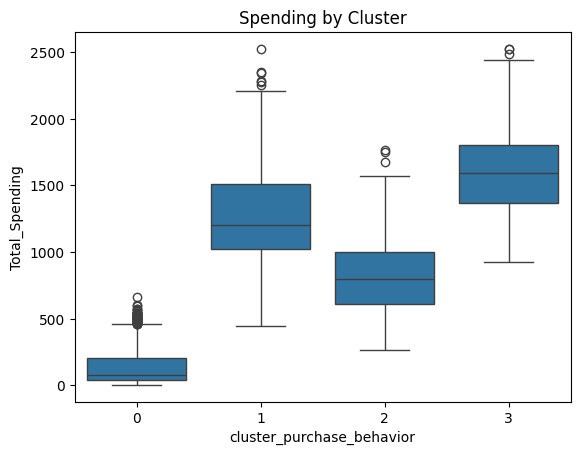

In [43]:
sns.boxplot(
    x='cluster_purchase_behavior',
    y='Total_Spending',
    data=df_purchase_behavior
)
plt.title('Spending by Cluster')
plt.show()

Using Elbow and Silhouette Score we can define the best K cluster, in this case we consider 4 clusters as best quantity.
In this case after analysing the Kmeans results we can see different gropus of customer:

* Less value customer with low spending
* Less value customer with high spending
* High value customer with low spending
* High value customer with high spending
* High value customer with low spending

In [44]:
df_purchase_behavior.to_csv("../data/processed/clustering/purchase_behavior_clustered.csv", index=False, sep=",")